# Figure 2c: Co 0-->1 Timepoint Graph
## Import Modules

In [65]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from turtles.turtles_utils import *

## Set Filepaths

In [3]:
#: Overall directory for TdT project data and analysis
tdt_dir = 'C:/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['Namita_23630_Mg_Col_T0_1-167005853',
                      'Namita_23630_Mg_Col_T0_2-166999859',
                      'Namita_23630_Mg_Col_T0_3-167009845']

#: Filename prefixes for 1 control conditions
one_control_conds = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                     'Namita_23630_Cobalt_Col_T0_2-166993853',
                     'Namita_23630_Cobalt_Col_T0_3-166999858']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'Data_and_Results/Cobalt_01/Co_01_Paired_Simple_Cut_Final/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load Sequences

In [5]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=5.8)

Loading Namita_23630_Cobalt_Col_10_min_1-166999856
Read 543724 sequences...

Loading Namita_23630_Cobalt_Col_10_min_2-167010846
Read 713786 sequences...

Loading Namita_23630_Cobalt_Col_10_min_3-167008844
Read 781199 sequences...

Loading Namita_23630_Cobalt_Col_20_min_1-167006850
Read 634854 sequences...

Loading Namita_23630_Cobalt_Col_20_min_2-166996865
Read 618589 sequences...

Loading Namita_23630_Cobalt_Col_20_min_3-166999857
Read 623927 sequences...

Loading Namita_23630_Cobalt_Col_45_min_1-166996866
Read 620758 sequences...

Loading Namita_23630_Cobalt_Col_45_min_2-167009844
Read 578837 sequences...

Loading Namita_23630_Cobalt_Col_45_min_3-166992854
Read 556232 sequences...

Loading Namita_23630_Cobalt_Col_T0_1-167010847
Read 632005 sequences...

Loading Namita_23630_Cobalt_Col_T0_2-166993853
Read 517898 sequences...

Loading Namita_23630_Cobalt_Col_T0_3-166999858
Read 613767 sequences...

Loading Namita_23630_Mg_Col_T0_1-167005853
Read 611651 sequences...

Loading Namita_2363

## Choose Legend Labels for Plotting
### Condition Labels

In [54]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    cond = condition[:10]
    if 'Cobalt_Col_T0' in condition:
        condition_dict[condition] = '1 Control'
    elif 'Cobalt_Col_10_min' in condition:
        condition_dict[condition] = '01 at 10 min'
    elif 'Cobalt_Col_20_min' in condition:
        condition_dict[condition] = '01 at 20 min'
    elif 'Cobalt_Col_45_min' in condition:
        condition_dict[condition] = '01 at 45 min'
    elif 'Mg_Col_T0' in condition:
        condition_dict[condition] = '0 Control'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT Control'
    else:
        print(condition, 'not recognized.')

### Replicate Labels

In [61]:
rep_dict = {}
for condition in conditions:
    if 'NoTdT' in condition:
        rep_dict[condition] = 1
    else:
        rep_dict[condition] = condition[-11]

## Bin Sequences, Calculate dNTP Frequency, and Transform into Aitchison Space
Note: Binning can take a while.

In [10]:
counts_dict = get_norm_len_base_counts(seqs_dict, num_bins=1000)

Namita_23630_Cobalt_Col_10_min_1-166999856 processed

Namita_23630_Cobalt_Col_10_min_2-167010846 processed

Namita_23630_Cobalt_Col_10_min_3-167008844 processed

Namita_23630_Cobalt_Col_20_min_1-167006850 processed

Namita_23630_Cobalt_Col_20_min_2-166996865 processed

Namita_23630_Cobalt_Col_20_min_3-166999857 processed

Namita_23630_Cobalt_Col_45_min_1-166996866 processed

Namita_23630_Cobalt_Col_45_min_2-167009844 processed

Namita_23630_Cobalt_Col_45_min_3-166992854 processed

Namita_23630_Cobalt_Col_T0_1-167010847 processed

Namita_23630_Cobalt_Col_T0_2-166993853 processed

Namita_23630_Cobalt_Col_T0_3-166999858 processed

Namita_23630_Mg_Col_T0_1-167005853 processed

Namita_23630_Mg_Col_T0_2-166999859 processed

Namita_23630_Mg_Col_T0_3-167009845 processed

Namita_23630_NoTdT_Col-166993854 processed



In [49]:
pcts_dict = calc_norm_len_base_pcts(counts_dict)

In [50]:
clr_data = calc_aitchison_distance(pcts_dict)

## Calculate and Plot Timepoint Results
### Convert Data into Long-Form pandas DataFrame

In [122]:
data = generate_aitch_df(pcts_dict, clr_data, condition_dict, rep_dict,
                         zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,G % Aitch Diff from 0,T % Aitch Diff from 0,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.011728,0.033177,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.011728,0.033177,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.011728,0.033177,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.011728,0.033177,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.011728,0.033177,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742


In [124]:
data = calc_signal(data, zero_control_conds, one_control_conds)
data.head()

,Directory,Condition,Replicate,Bin Number,Aitch Dist (from 0),Aitch Dist (from 1),A % Aitch,C % Aitch,G % Aitch,T % Aitch,...,A % Aitch Diff from 1,C % Aitch Diff from 1,G % Aitch Diff from 1,T % Aitch Diff from 1,A %,C %,G %,T %,Aitch Fraction,Signal
0,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,1,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742,0.083211,0.0653
1,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,2,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742,0.083211,0.0653
2,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,3,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742,0.083211,0.0653
3,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,4,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742,0.083211,0.0653
4,Namita_23630_Cobalt_Col_10_min_1-166999856,01 at 10 min,1,5,0.052221,0.575357,0.010788,-0.297666,0.84043,-0.553553,...,0.494134,0.105545,0.204967,0.183622,0.217575,0.159826,0.498789,0.123742,0.083211,0.0653


### Calculate Switch Times

In [125]:
len_dists = get_length_dists(seqs_dict)
averages = parse_fastq_lengths(len_dists, expt_time=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min)
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.971979,9.739174,0.266200
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.481911,9.720719,0.274699
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.667149,9.892791,0.277786
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.983848,10.025459,0.266397
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.798126,10.141003,0.279969
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.502844,9.513421,0.241714
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.285280,9.714863,0.254755
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.902695,9.398647,0.231712
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.873686,9.690183,0.247895
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.644936,10.122800,0.277416


In [126]:
averages = calc_switch_bins(averages, data, mode='01')
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.971979,9.739174,0.266200,181.390269
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.481911,9.720719,0.274699,166.109246
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.667149,9.892791,0.277786,181.938869
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.983848,10.025459,0.266397,400.063550
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.798126,10.141003,0.279969,357.491640
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.502844,9.513421,0.241714,363.949249
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.285280,9.714863,0.254755,777.458581
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.902695,9.398647,0.231712,789.276804
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.873686,9.690183,0.247895,800.587440
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.644936,10.122800,0.277416,NaN


In [127]:
averages = calc_switch_times(averages, num_bins=1000, start_control_conds=zero_control_conds,
                             end_control_conds=one_control_conds, t_expt=60)
averages

,Directory,Mean,Std Devs,Rate (nt/min),Switch Bin,Switch Time
0,Namita_23630_Cobalt_Col_10_min_1-166999856,15.971979,9.739174,0.266200,181.390269,9.931755
1,Namita_23630_Cobalt_Col_10_min_2-167010846,16.481911,9.720719,0.274699,166.109246,9.080244
2,Namita_23630_Cobalt_Col_10_min_3-167008844,16.667149,9.892791,0.277786,181.938869,9.962377
3,Namita_23630_Cobalt_Col_20_min_1-167006850,15.983848,10.025459,0.266397,400.063550,22.428778
4,Namita_23630_Cobalt_Col_20_min_2-166996865,16.798126,10.141003,0.279969,357.491640,19.949180
5,Namita_23630_Cobalt_Col_20_min_3-166999857,14.502844,9.513421,0.241714,363.949249,20.323824
6,Namita_23630_Cobalt_Col_45_min_1-166996866,15.285280,9.714863,0.254755,777.458581,45.463245
7,Namita_23630_Cobalt_Col_45_min_2-167009844,13.902695,9.398647,0.231712,789.276804,46.216647
8,Namita_23630_Cobalt_Col_45_min_3-166992854,14.873686,9.690183,0.247895,800.587440,46.939598
9,Namita_23630_Cobalt_Col_T0_1-167010847,16.644936,10.122800,0.277416,NaN,NaN


In [136]:
print('Switch Time Averages (Figure 2d)')
[averages['Switch Time'][0:3].mean(),
 averages['Switch Time'][3:6].mean(),
 averages['Switch Time'][6:9].mean()]

Switch Time Averages (Figure 2d)


[9.658125057407583, 20.900593848467306, 46.20649634426275]

In [135]:
print('Switch Time Standard Deviations (Figure 2d)')
[averages['Switch Time'][0:3].std(),
 averages['Switch Time'][3:6].std(),
 averages['Switch Time'][6:9].std()]

Switch Time Standard Deviations (Figure 2d)


[0.5006940462964814, 1.3366370240901295, 0.7382287926863116]

### Plot Timepoint Results
Note: plotting can take a while if a lot of bins are used.

In [130]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

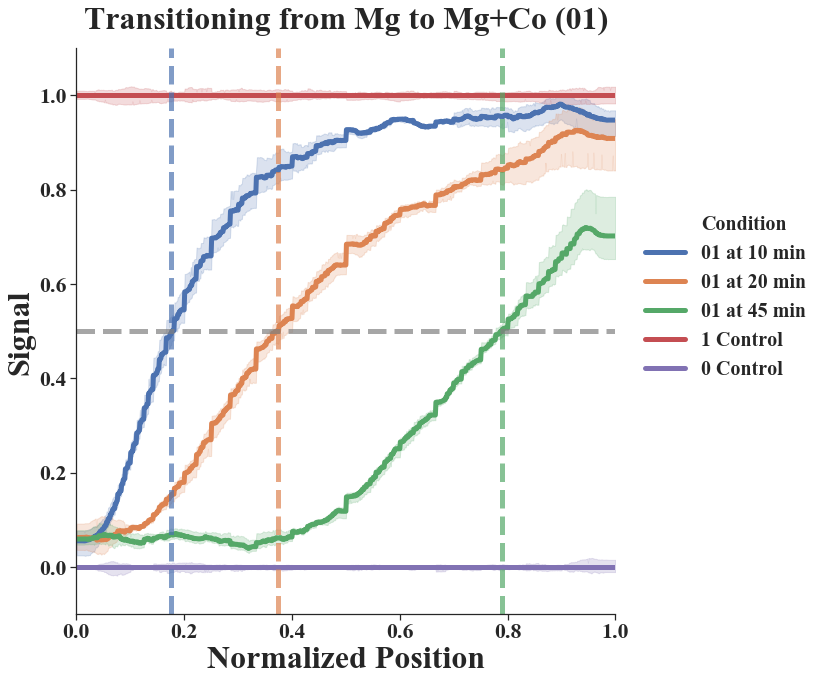

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

num_bins = 1000

sns.lineplot(x='Bin Number', y='Signal', hue='Condition',
             data=data[data.Condition != 'No TdT Control'], ax=ax)

ax.legend(loc=(1.04, 0.4), fontsize=20, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelleft=True, left=True, bottom=True)

ax.set_xlim(0, num_bins)
ax.set_xticks(range(0, num_bins + 1, int(num_bins / 5)))
ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32))
ax.set_xlabel('Normalized Position', fontsize=32)
ax.set_ylabel('Signal', fontsize=32)
ax.set_ylim(-0.1, 1.1)
ax.set_title('Transitioning from Mg to Mg+Co (01)', fontsize=32, pad=20)

# Add switch bins
ax.axvline(averages.iloc[0:3, 4].mean(), color=sns.color_palette()[0], alpha=.7, ls='--')
ax.axvline(averages.iloc[3:6, 4].mean(), color=sns.color_palette()[1], alpha=.7, ls='--')
ax.axvline(averages.iloc[6:9, 4].mean(), color=sns.color_palette()[2], alpha=.7, ls='--')

ax.axhline(0.5, color='0.5', alpha=0.7, ls='--')

plt.tight_layout()
fig.savefig(figure_dir + '01_Timepoint_Updated_w_1_Diff')
plt.show()

# Plot Individual dNTP %s
(Not included in paper)

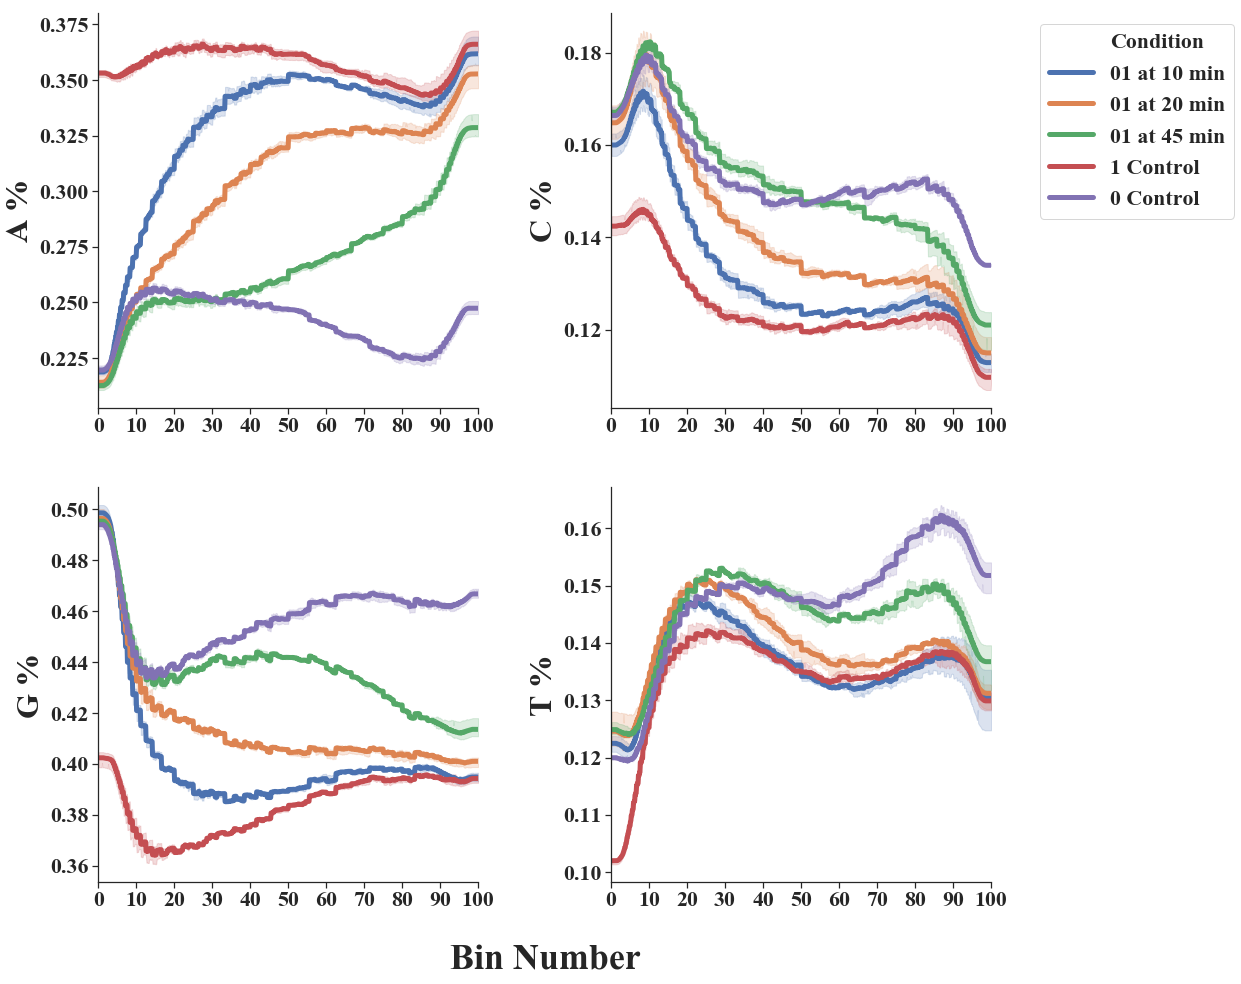

In [134]:
fig, axmatrix = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
seq_max = 1000

for i, base in enumerate(['A', 'C', 'G', 'T']):
    ax = axmatrix[int(np.floor(i / 2)), i % 2]
    
    if i == 1:
        legend = 'brief'
    else:
        legend = False
    
    ax = sns.lineplot(x='Bin Number', y='{} %'.format(base), hue='Condition',
                      data=data[data.Condition != 'No TdT Control'], ax=ax, legend=legend)
    
    if i == 1:
        ax.legend(bbox_to_anchor=(1.1,1), loc=2)

    ax.set_xlabel('')
    ax.set_ylabel('{} %'.format(base), fontsize=32)
    ax.set_xlim(1, seq_max)
    ax.set_xticks(range(0, seq_max + 100, 100))
    ax.set_xticklabels(range(0, 110, 10))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

fig.text(0.513, 0.05, 'Bin Number', ha='center', fontsize=36)

plt.subplots_adjust(wspace=.35)

fig.savefig(figure_dir + 'All_bases_pct')
plt.show()